# Data Analysis - Game of Thrones

In [41]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [42]:
df = pd.read_csv('/Users/rui/Desktop/dataScientist_udacity/battles.csv')
print("Data size is {}".format(df.shape))
df.head()

Data size is (38, 25)


,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


## Data Cleaning

Index(['defender_4', 'defender_3', 'attacker_4', 'defender_2', 'attacker_3',
       'note', 'attacker_2', 'defender_size', 'attacker_size',
       'defender_commander', 'defender_king', 'attacker_king', 'location',
       'battle_type', 'defender_1', 'major_death', 'major_capture',
       'attacker_commander', 'summer', 'attacker_outcome'],
      dtype='object')


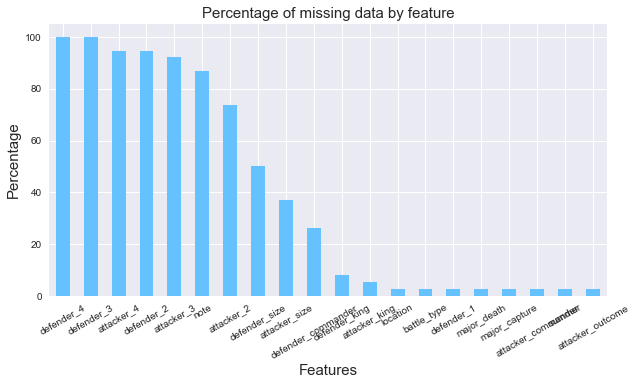

In [43]:
# Aggregate all null values 
all_data_na = (df.isnull().sum()/ len(df))*100

# Get rid of columns with 0 missing
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)

plt.subplots(figsize =(10, 5))
all_data_na.plot(kind='bar', color='#66c2ff');
plt.xticks(rotation=30)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.title('Percentage of missing data by feature', fontsize=15)

print(all_data_na.keys())

In [44]:
# Fill 'None' for columns which are string type
for col in ['defender_4', 'defender_3', 'attacker_4', 'defender_2', 'attacker_3','note', 'attacker_2', 
          'defender_commander', 'defender_king', 'attacker_king', 'location','battle_type', 
          'defender_1', 'attacker_commander']:
    df[col] = df[col].fillna("None")
print("'None' - treated...")

# Deal with ['defender_size', 'attacker_size', 'major_death', 'major_capture', 'summer', 'attacker_outcome']
# Drop one row
# df['attacker_outcome'].dropna(axis=0, inplace=True)
print(df.shape)
# print(len(df['attacker_outcome']))
# print(len(df['defender_size']))
# print(len(df['defender_1']))

# Replace NA with median value of the same defender_1 or defender_2 for 'defender_size', 'attacker_size'
df["defender_size"] = df.groupby("defender_1")["defender_size"].transform(
    lambda x: x.fillna(x.median()))
df["attacker_size"] = df.groupby("attacker_1")["attacker_size"].transform(
    lambda x: x.fillna(x.median()))
df["defender_size"] = df.groupby("defender_2")["defender_size"].transform(
    lambda x: x.fillna(x.median()))
df["attacker_size"] = df.groupby("attacker_2")["attacker_size"].transform(
    lambda x: x.fillna(x.median()))
print("'defender_size', 'attacker_size' - treated...")

# Fill 0 for NA in 'major_death', 'major_capture', 'summer'
for col in ('major_death', 'major_capture', 'summer'):
    df[col] = df[col].fillna(0)
print("'0' - treated...")

'None' - treated...
(38, 25)
'defender_size', 'attacker_size' - treated...
'0' - treated...


In [45]:
all_data_na = df.isnull().sum()
print("Features with missing values: ", len(all_data_na.drop(all_data_na[all_data_na == 0].index)))
print(all_data_na.drop(all_data_na[all_data_na == 0].index))

# Deal with missing values and check again
df.dropna(axis=0, inplace=True)
all_data_na = df.isnull().sum()
print("Features with missing values: ", len(all_data_na.drop(all_data_na[all_data_na == 0].index)))

Features with missing values:  1
attacker_outcome    1
dtype: int64
Features with missing values:  0


In [46]:
# Need a type change to category

# year
df['year'] = df['year'].astype(str)

# summer
df['summer'] = df['summer'].astype(str)

In [47]:
df.describe(include = ['object'])

,name,year,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,attacker_commander,defender_commander,summer,location,region,note
count,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
unique,37,3,5,7,11,8,3,2,12,2,1,1,2,4,31,28,2,28,7,6
top,Siege of Riverrun,299,Joffrey/Tommen Baratheon,Robb Stark,Lannister,None,None,None,Lannister,None,None,None,win,pitched battle,Gregor Clegane,None,1.0,Riverrun,The Riverlands,None
freq,1,20,14,14,8,28,35,36,9,36,37,37,32,14,4,10,26,3,17,32


In [48]:
df.describe(exclude = ['object'])

,battle_number,major_death,major_capture,attacker_size,defender_size
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,19.000000,0.351351,0.297297,8494.459459,5358.378378
std,10.824355,0.483978,0.463373,16761.962356,4869.312645
min,1.000000,0.000000,0.000000,20.000000,100.000000
25%,10.000000,0.000000,0.000000,618.000000,3500.000000
50%,19.000000,0.000000,0.000000,3500.000000,3750.000000
75%,28.000000,1.000000,1.000000,15000.000000,8625.000000
max,37.000000,1.000000,1.000000,100000.000000,20000.000000


## Question 1: When and where wars happened?

Text(0.5,1,'Where wars happened')

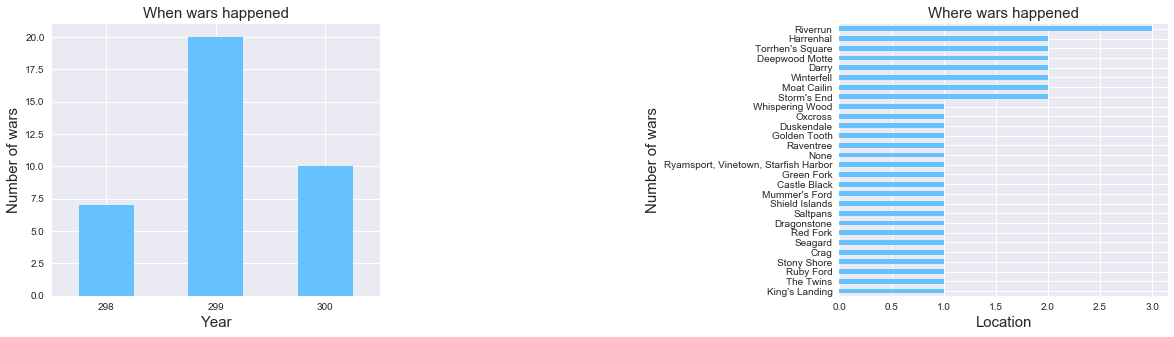

In [49]:
war_time = df.groupby(['year']).name.count()
# war_location = df.groupby(['location']).name.count()

plt.subplots(figsize=(20, 5))

plt.subplot(1, 3, 1)
war_time.plot(kind='bar', color='#66c2ff')
plt.xticks(rotation=0)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of wars', fontsize=15)
plt.title('When wars happened', fontsize=15)

plt.subplot(1, 3, 3)
# war_location.plot(kind='barh', color='#66c2ff')
war_location = df.location.value_counts(ascending=True).plot(kind='barh', color='#66c2ff')
plt.xlabel('Location', fontsize=15)
plt.ylabel('Number of wars', fontsize=15)
plt.title('Where wars happened', fontsize=15)

### Conclusion 1
##### When
- War occured in year 298, 299 and 300.
- Most wars happened in 298.

##### Where
- Most wars happend in different places.
- Rivenrun is the only place with 3 wars.

## Qustion 2: more major_death or more major_capture?

Text(0.5,1,"Each year's major_death and major_capture")

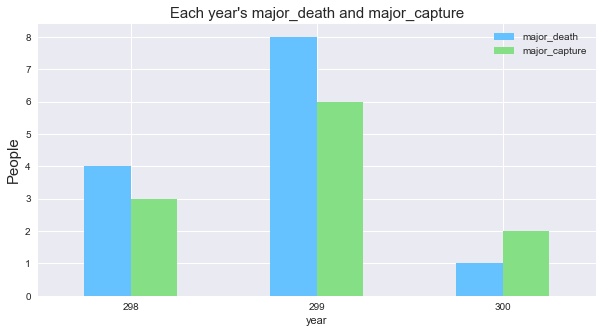

In [50]:
major_death_num = (df.groupby(['year']).sum())['major_death']
major_capture_num = (df.groupby(['year']).sum())['major_capture']

major = pd.DataFrame([war_time.keys(), major_death_num.values, major_capture_num.values], 
                   index=['year', 'major_death', 'major_capture']).T
major.set_index('year', inplace=True)

major.plot(kind='bar', figsize=(10, 5), color=["#66c2ff", "#85e085"])
plt.xticks(rotation=0)
plt.ylabel('People', fontsize=15)
plt.title("Each year's major_death and major_capture", fontsize=15)

### Conclusion 2
- There were more major death and capture in 299 compared to year 298 and year 300.
- In 298 and 299, there are more death than capture. While there are more capture than death in 300.

## Question 3: are big-sized troops more likely to win?

Text(0.5,1,'Relative_size distribution')

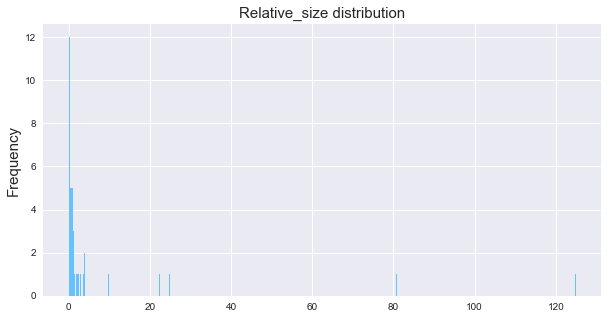

In [51]:
# Calculate new variable to represent relative troop quantities
df['relative_size'] = df['attacker_size']/df['defender_size']
df['relative_size'].hist(bins=400, figsize=(10, 5), color="#66c2ff")
plt.ylabel('Frequency', fontsize=15)
plt.title("Relative_size distribution", fontsize=15)

In [52]:
# One army with double soldiers would be treated as advantaged
df['relative_size_Flag'] = df['relative_size'].map(lambda x:'Advantaged' if x>=2 else 'Disadvantaged')
df.drop('relative_size', axis=1, inplace=True)

relative_size_Flag  attacker_outcome
Advantaged          loss                0.272727
                    win                 0.727273
Disadvantaged       loss                0.076923
                    win                 0.923077
Name: name, dtype: float64


Text(0.5,1,'Advantaged v.s. Disadvantaged in quantity')

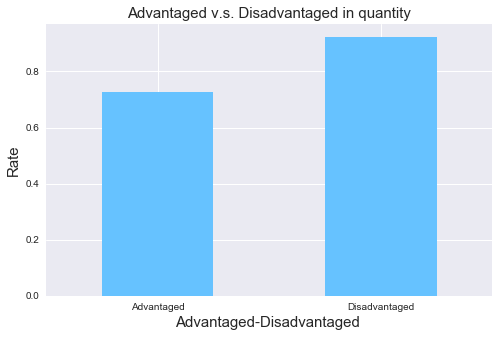

In [53]:
win_or_loss_rate = (df.groupby(['relative_size_Flag', 'attacker_outcome']).name.count()/
                 df.groupby(['relative_size_Flag']).name.count())
print(win_or_loss_rate)
win_or_loss_rate.unstack()['win'].plot(kind='bar', figsize=(8,5), color="#66c2ff")
plt.xticks(rotation=0)
plt.xlabel('Advantaged-Disadvantaged ', fontsize=15)
plt.ylabel('Rate', fontsize=15)
plt.title("Advantaged v.s. Disadvantaged in quantity", fontsize=15)

### Conclusion 3
- It revealed that one with more soldiers (double size or more) didn't win more.
- Actually, the attackers won more despite of the troop size as shown in the figure above.

## Qestion 4: Variables' Correlation

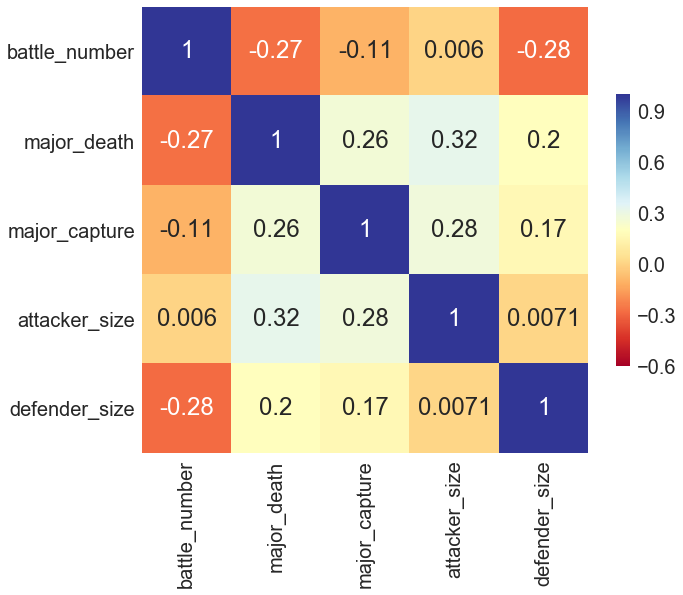

In [63]:
corr = df.corr()
plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.set(font_scale=2)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True)

## Reflection

- I have taken good care of the data provided. 
- The dataset may be too small for analysis.